# Distribuciones en Forma de Anillo

In [1]:
from math import sin, cos, radians, pi, sqrt
import numpy.random as rnd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def ring(r_min = 0, r_max = 1, n_samples = 360):
    angle = rnd.uniform(0, 2*pi, n_samples)
    distance = rnd.uniform(r_min, r_max, n_samples)
    data = []
    for a, d in zip(angle, distance):
        data.append([d*cos(a), d*sin(a)])
    return np.array(data)

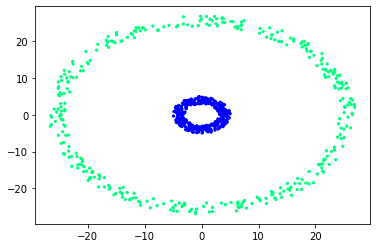

In [5]:
data1 = ring(3, 5)
data2 = ring(24, 27)

data = np.concatenate([data1, data2], axis = 0)
labels = np.concatenate([[0 for i in range(0,len(data1))], [1 for i in range(0,len(data2))]])
plt.scatter(data[:,0], data[:,1], c = labels, s = 5, cmap = "winter");

# Algoritmo con Kmeans

In [6]:
from sklearn.cluster import KMeans

In [7]:
km = KMeans(2).fit(data)

In [8]:
clust = km.predict(data)

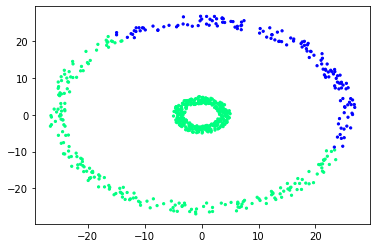

In [10]:
plt.scatter(data[:,0], data[:, 1], c = clust, s = 5, cmap="winter");

# Algoritmo de los K Medoides

In [16]:
#!pip3 install pyclust
#!pip3 install treelib

In [17]:
from pyclust import KMedoids

In [30]:
kmed = KMedoids(2).fit_predict(data)

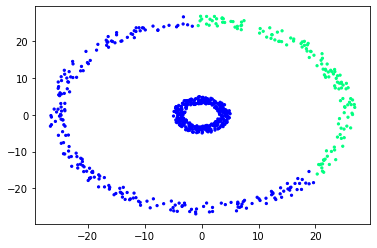

In [31]:
plt.scatter(data[:,0], data[:,1], c=kmed, s=5, cmap="winter");

# Algoritmo del Clustering Espectral

In [24]:
from sklearn.cluster import SpectralClustering

In [21]:
clust = SpectralClustering(2).fit_predict(data)

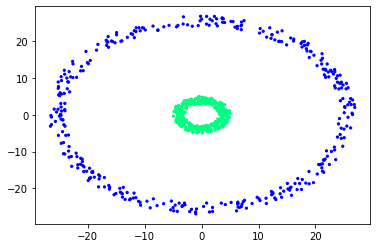

In [25]:
plt.scatter(data[:,0], data[:,1], c = clust, s = 5, cmap = "winter");

* Podemos estimar la k:
    * No: Propagación de la afinidad
    * Si: Podemos usar la distancia Euclídea:
        * Si: K-Means
        * No: Buscar valores centrales:
            * Si: K-Medoides 
            * No: Los datos son linealmente separables:
                * Si: Clustering aglomerativo
                * No: Clustering Espectral